In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import joblib

# Load the dataset
df = pd.read_csv("Real_Cleaned_data.csv")

params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 1.0]
}

# Select features and target
features = ['AOD','CO','PM25','humidity','temperature']
target = 'AQI'
X = df[features]
y = df[target]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = GridSearchCV(XGBRegressor(random_state=42), param_grid=params, cv=3, scoring='r2', verbose=1, n_jobs=-1)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
best_model = model.best_estimator_
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")
print("Best Parameters:", model.best_params_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
MAE: 0.42
R² Score: 0.88
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}


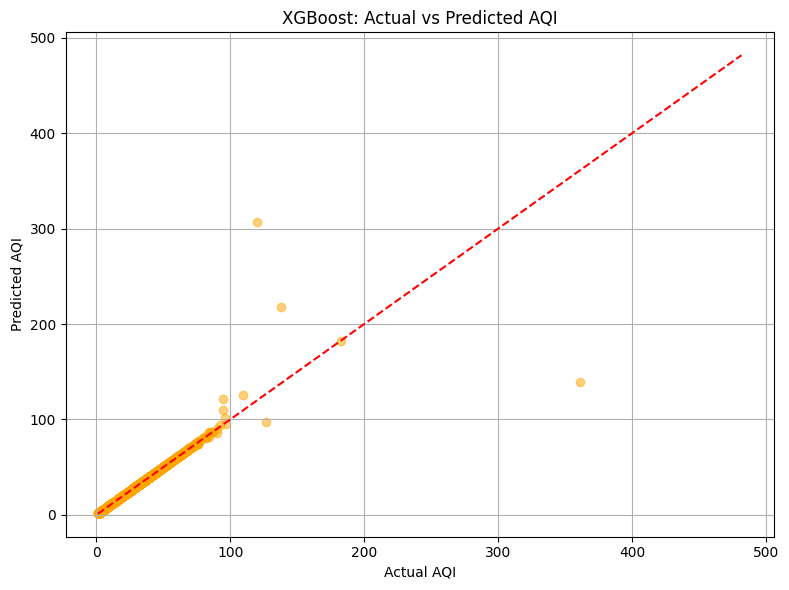

In [2]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='orange', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("XGBoost: Actual vs Predicted AQI")
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
joblib.dump(model, "fine_tuned_aqi_model.pkl")

['fine_tuned_aqi_model.pkl']